In [25]:
import pandas as pd
import os
import sys
import requests
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry
import matplotlib.pyplot as plt

from vayu_gnn.dbx.dbx_config import dbx_helper, DropboxHelper

### Establish Open Meteo lat-lons for each static sensor

In [22]:
# Create sample DataFrame with sensor locations
sensor_locations = pd.DataFrame({
    'sensor_id': [f'S{i:03d}' for i in range(1, 11)],
    'lat': [
        25.591564, 37.774929, 51.509865, 48.856614, 35.689487,
        40.712776, -33.868820, -37.813629, 1.352083, 19.075983
    ],
    'lon': [
        85.240430, -122.419418, -0.118092, 2.352222, 139.691711,
        -74.005974, 151.209296, 144.963058, 103.819836, 72.877655
    ]
})

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after=3600)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

url = "https://archive-api.open-meteo.com/v1/archive"

# Create lists to store the response coordinates
response_lats = []
response_lons = []
sensor_ids = []

# Loop through each sensor in the DataFrame
for index, row in sensor_locations.iterrows():
    params = {
        "latitude": row['lat'],
        "longitude": row['lon'],
        "start_date": "2024-05-01",
        "end_date": "2025-02-28",
        "hourly": [
            "temperature_2m"
        ]
    }
    
    try:
        responses = openmeteo.weather_api(url, params=params)
        response = responses[0]
        
        # Store the response coordinates
        sensor_ids.append(row['sensor_id'])
        response_lats.append(response.Latitude())
        response_lons.append(response.Longitude())
        
        print(f"Sensor {row['sensor_id']} - Coordinates {response.Latitude()}°N {response.Longitude()}°E")
        
    except Exception as e:
        print(f"Error fetching data for sensor {row['sensor_id']}: {e}")

# Create a DataFrame with the stored coordinates
response_coords = pd.DataFrame({
    'sensor_id': sensor_ids,
    'response_lat': response_lats,
    'response_lon': response_lons
})

# Join with the original sensor_locations DataFrame to compare
result = sensor_locations.merge(response_coords, on='sensor_id')
print("\nOriginal vs Response Coordinates:")
print(result[['sensor_id', 'lat', 'lon', 'response_lat', 'response_lon']])

Sensor S001 - Coordinates 25.623899459838867°N 85.2065200805664°E
Sensor S002 - Coordinates 37.785587310791016°N -122.40963745117188°E
Sensor S003 - Coordinates 51.49384689331055°N -0.16302490234375°E
Sensor S004 - Coordinates 48.82249450683594°N 2.288135528564453°E
Sensor S005 - Coordinates 35.6766242980957°N 139.6911163330078°E
Sensor S006 - Coordinates 40.738136291503906°N -74.04254150390625°E
Sensor S007 - Coordinates -33.84885787963867°N 151.1955108642578°E
Sensor S008 - Coordinates -37.785587310791016°N 144.93975830078125°E
Sensor S009 - Coordinates 1.3708258867263794°N 103.8023681640625°E
Sensor S010 - Coordinates 19.08611488342285°N 72.85291290283203°E

Original vs Response Coordinates:
  sensor_id        lat         lon  response_lat  response_lon
0      S001  25.591564   85.240430     25.623899     85.206520
1      S002  37.774929 -122.419418     37.785587   -122.409637
2      S003  51.509865   -0.118092     51.493847     -0.163025
3      S004  48.856614    2.352222     48.82

In [23]:
# Create sample DataFrame with sensor locations
sensor_locations = pd.DataFrame({
    'sensor_id': [f'S{i:03d}' for i in range(1, 11)],
    'lat': [
        25.591564, 37.774929, 51.509865, 48.856614, 35.689487,
        40.712776, -33.868820, -37.813629, 1.352083, 19.075983
    ],
    'lon': [
        85.240430, -122.419418, -0.118092, 2.352222, 139.691711,
        -74.005974, 151.209296, 144.963058, 103.819836, 72.877655
    ]
})

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after=3600)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

url = "https://historical-forecast-api.open-meteo.com/v1/forecast"

# Create lists to store the response coordinates
response_lats = []
response_lons = []
sensor_ids = []

# Loop through each sensor in the DataFrame
for index, row in sensor_locations.iterrows():
    params = {
        "latitude": row['lat'],
        "longitude": row['lon'],
        "start_date": "2024-05-01",
        "end_date": "2025-02-28",
        "hourly": [
            "temperature_2m"
        ]
    }
    
    try:
        responses = openmeteo.weather_api(url, params=params)
        response = responses[0]
        
        # Store the response coordinates
        sensor_ids.append(row['sensor_id'])
        response_lats.append(response.Latitude())
        response_lons.append(response.Longitude())
        
        print(f"Sensor {row['sensor_id']} - Coordinates {response.Latitude()}°N {response.Longitude()}°E")
        
    except Exception as e:
        print(f"Error fetching data for sensor {row['sensor_id']}: {e}")

# Create a DataFrame with the stored coordinates
response_coords = pd.DataFrame({
    'sensor_id': sensor_ids,
    'response_lat': response_lats,
    'response_lon': response_lons
})

# Join with the original sensor_locations DataFrame to compare
result = sensor_locations.merge(response_coords, on='sensor_id')
print("\nOriginal vs Response Coordinates:")
print(result[['sensor_id', 'lat', 'lon', 'response_lat', 'response_lon']])

Sensor S001 - Coordinates 25.625°N 85.25°E
Sensor S002 - Coordinates 37.763282775878906°N -122.41285705566406°E
Sensor S003 - Coordinates 51.5°N -0.12000012397766113°E
Sensor S004 - Coordinates 48.86000061035156°N 2.359999656677246°E
Sensor S005 - Coordinates 35.70000076293945°N 139.6875°E
Sensor S006 - Coordinates 40.71033477783203°N -73.99308776855469°E
Sensor S007 - Coordinates -33.75°N 151.125°E
Sensor S008 - Coordinates -37.75°N 144.875°E
Sensor S009 - Coordinates 1.375°N 103.875°E
Sensor S010 - Coordinates 19.125°N 72.875°E

Original vs Response Coordinates:
  sensor_id        lat         lon  response_lat  response_lon
0      S001  25.591564   85.240430     25.625000     85.250000
1      S002  37.774929 -122.419418     37.763283   -122.412857
2      S003  51.509865   -0.118092     51.500000     -0.120000
3      S004  48.856614    2.352222     48.860001      2.360000
4      S005  35.689487  139.691711     35.700001    139.687500
5      S006  40.712776  -74.005974     40.710335   

### Test Open Meteo historical forecast API


In [ ]:
# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
url = "https://historical-forecast-api.open-meteo.com/v1/forecast"
params = {
    "latitude": 25.591564,
    "longitude": 85.240430,
    "start_date": "2024-05-01",
    "end_date": "2025-02-28",
    "hourly": [
        "temperature_2m",
        "wind_speed_10m",
        "wind_direction_10m",
        "relative_humidity_2m",
        "precipitation",
        "soil_temperature_0cm",
        "soil_moisture_0_to_1cm",
        "surface_pressure",
        "cloud_cover"
    ]
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(1).ValuesAsNumpy()
hourly_wind_direction_10m = hourly.Variables(2).ValuesAsNumpy()
hourly_relative_humidity_2m = hourly.Variables(3).ValuesAsNumpy()
hourly_precipitation = hourly.Variables(4).ValuesAsNumpy()
hourly_soil_temperature_0cm = hourly.Variables(5).ValuesAsNumpy()
hourly_soil_moisture_0_to_1cm = hourly.Variables(6).ValuesAsNumpy()
hourly_surface_pressure = hourly.Variables(7).ValuesAsNumpy()
hourly_cloud_cover = hourly.Variables(8).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
    start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
    end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
    freq = pd.Timedelta(seconds = hourly.Interval()),
    inclusive = "left"
)}

# Add all the requested weather variables to the data dictionary
hourly_data["temperature"] = hourly_temperature_2m
hourly_data["wind_speed"] = hourly_wind_speed_10m
hourly_data["wind_direction"] = hourly_wind_direction_10m
hourly_data["humidity"] = hourly_relative_humidity_2m
hourly_data["precipitation"] = hourly_precipitation
hourly_data["soil_temperature"] = hourly_soil_temperature_0cm
hourly_data["soil_moisture"] = hourly_soil_moisture_0_to_1cm
hourly_data["pressure"] = hourly_surface_pressure
hourly_data["cloud_cover"] = hourly_cloud_cover

# Create the DataFrame with all the weather data
hourly_dataframe = pd.DataFrame(data = hourly_data)

# Display information about the DataFrame
print("\nDataFrame Information:")
print(hourly_dataframe.info())

Coordinates 25.625°N 85.25°E
Elevation 57.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7296 entries, 0 to 7295
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   date              7296 non-null   datetime64[ns, UTC]
 1   temperature       7296 non-null   float32            
 2   wind_speed        7296 non-null   float32            
 3   wind_direction    7296 non-null   float32            
 4   humidity          7296 non-null   float32            
 5   precipitation     7296 non-null   float32            
 6   soil_temperature  7296 non-null   float32            
 7   soil_moisture     7296 non-null   float32            
 8   pressure          7296 non-null   float32            
 9   cloud_cover       7296 non-null   float32            
dtypes: datetime64[ns, UTC](1), float32(9)
memory usage: 31

### Test historical weather data archive API

In [ ]:
# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
    "latitude": 25.591564,
    "longitude": 85.240430,
    "start_date": "2024-05-01",
    "end_date": "2025-02-28",
    "hourly": [
        "temperature_2m",
        "wind_speed_10m",
        "wind_direction_10m",
        "relative_humidity_2m",
        "precipitation",
        "soil_temperature_0_to_7cm",
        "soil_moisture_0_to_7cm",
        "surface_pressure",
        "cloud_cover"
    ]
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(1).ValuesAsNumpy()
hourly_wind_direction_10m = hourly.Variables(2).ValuesAsNumpy()
hourly_relative_humidity_2m = hourly.Variables(3).ValuesAsNumpy()
hourly_precipitation = hourly.Variables(4).ValuesAsNumpy()
hourly_soil_temperature_0_to_7cm = hourly.Variables(5).ValuesAsNumpy()
hourly_soil_moisture_0_to_7cm = hourly.Variables(6).ValuesAsNumpy()
hourly_surface_pressure = hourly.Variables(7).ValuesAsNumpy()
hourly_cloud_cover = hourly.Variables(8).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
    start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
    end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
    freq = pd.Timedelta(seconds = hourly.Interval()),
    inclusive = "left"
)}

# Add all the requested weather variables to the data dictionary
hourly_data["temperature"] = hourly_temperature_2m
hourly_data["wind_speed"] = hourly_wind_speed_10m
hourly_data["wind_direction"] = hourly_wind_direction_10m
hourly_data["humidity"] = hourly_relative_humidity_2m
hourly_data["precipitation"] = hourly_precipitation
hourly_data["soil_temperature"] = hourly_soil_temperature_0_to_7cm
hourly_data["soil_moisture"] = hourly_soil_moisture_0_to_7cm
hourly_data["pressure"] = hourly_surface_pressure
hourly_data["cloud_cover"] = hourly_cloud_cover

# Create the DataFrame with all the weather data
hourly_dataframe = pd.DataFrame(data = hourly_data)

# Display information about the DataFrame
print("\nDataFrame Information:")
print(hourly_dataframe.info())


Coordinates 25.623899459838867°N 85.2065200805664°E
Elevation 57.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7296 entries, 0 to 7295
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   date              7296 non-null   datetime64[ns, UTC]
 1   temperature       7296 non-null   float32            
 2   wind_speed        7296 non-null   float32            
 3   wind_direction    7296 non-null   float32            
 4   humidity          7296 non-null   float32            
 5   precipitation     7296 non-null   float32            
 6   soil_temperature  7296 non-null   float32            
 7   soil_moisture     7296 non-null   float32            
 8   pressure          7296 non-null   float32            
 9   cloud_cover       7296 non-null   float32            
dtypes: datetime64[ns, UTC](1), floa

### Quality controls

In [ ]:
# Check that the summary stats and likely units are the same between the historical forecast and archive data
# Loop through each column and print summary stats side by side
for col in hist_fore.columns:
    print(f"\n--- {col} ---")
    print("hist_fore:\n", hist_fore[col].describe(), "\n")
    print("hourly_dataframe:\n", hourly_dataframe[col].describe(), "\n")
    print("-" * 50)


--- date ---
hist_fore:
 count                         7296
mean     2024-09-29 23:30:00+00:00
min      2024-05-01 00:00:00+00:00
25%      2024-07-15 23:45:00+00:00
50%      2024-09-29 23:30:00+00:00
75%      2024-12-14 23:15:00+00:00
max      2025-02-28 23:00:00+00:00
Name: date, dtype: object 

hourly_dataframe:
 count                         7296
mean     2024-09-29 23:30:00+00:00
min      2024-05-01 00:00:00+00:00
25%      2024-07-15 23:45:00+00:00
50%      2024-09-29 23:30:00+00:00
75%      2024-12-14 23:15:00+00:00
max      2025-02-28 23:00:00+00:00
Name: date, dtype: object 

--------------------------------------------------

--- temperature ---
hist_fore:
 count    7296.000000
mean       26.383015
std         6.496392
min        10.896000
25%        21.695999
50%        27.646000
75%        30.695999
max        44.445999
Name: temperature, dtype: float64 

hourly_dataframe:
 count    7296.000000
mean       25.523851
std         6.672966
min         8.680500
25%        20.6304

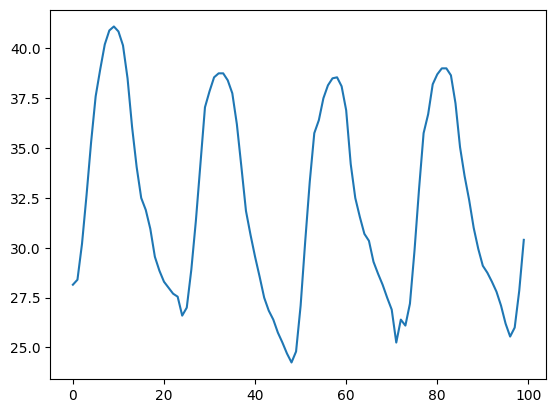

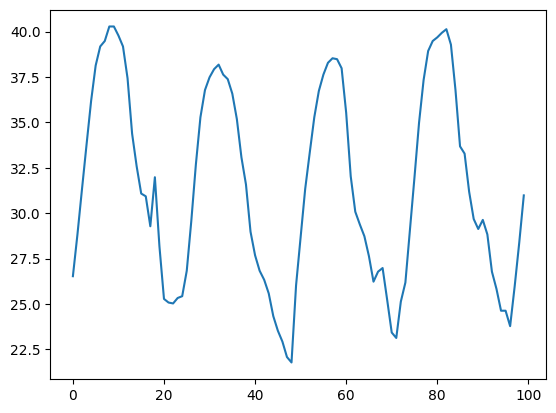

In [ ]:
# Check that the time series are aligned between the historical forecast and archive data

# For the first 100 obs, plot temperature from hist_fore as a line
hist_fore["temperature"].head(100).plot()
plt.show()

# For the first 100 obs, plot temperature from hourly_dataframe as a line
hourly_dataframe["temperature"].head(100).plot()
plt.show()